<a href="https://colab.research.google.com/github/yooon27/Embedded-Software-Contest2023/blob/main/roboflow_practice_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L "https://public.roboflow.com/ds/XuEYNzkV8P?key=tavzG5usNE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt
#필요 패키지 설치

In [ ]:
%cat /content/dataset/data.yaml
#nc는 클래스 갯수
#names는 클래스 이름

In [ ]:
%cd /
from glob import glob

img_list = glob('/content/dataset/train/images/*.jpg')

print(len(img_list))

#train 의 이미지 갯수 확

In [14]:
train_img_list = glob('/content/dataset/train/images/*.jpg')
val_img_list = glob('/content/dataset/valid/images/*.jpg')

with open('/content/dataset/train.txt','w') as f:
  f.write('\n'.join(train_img_list)+'\n')
with open('/content/dataset/val.txt','w') as f:
  f.write('\n'.join(val_img_list)+'\n')

In [15]:
import yaml

with open('/content/dataset/data.yaml','r')as f:
  data = yaml.full_load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'], 'nc': 7, 'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt'}
{'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'], 'nc': 7, 'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt'}


In [16]:
%cd /content/yolov5/

!python train.py --img 640 --batch 16 --epochs 60 --data /content/dataset/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name aquarium_yolov5m_result

/content/yolov5
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=aquarium_yolov5m_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs

detect: weights=['/content/yolov5/runs/train/aquarium_yolov5m_result/weights/best.pt'], source=/content/dataset/valid/images/IMG_2523_jpeg_jpg.rf.efd9f79430fc015890b4a4ad5ddfe3ad.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20877180 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/dataset/valid/images/IMG_2523_jpeg_jpg.rf.efd9f79430fc015890b4a4ad5ddfe3ad.jpg: 640x480 4 fishs, 11 puffins, 46.3ms
Speed: 0.5ms pre-process, 46.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved t

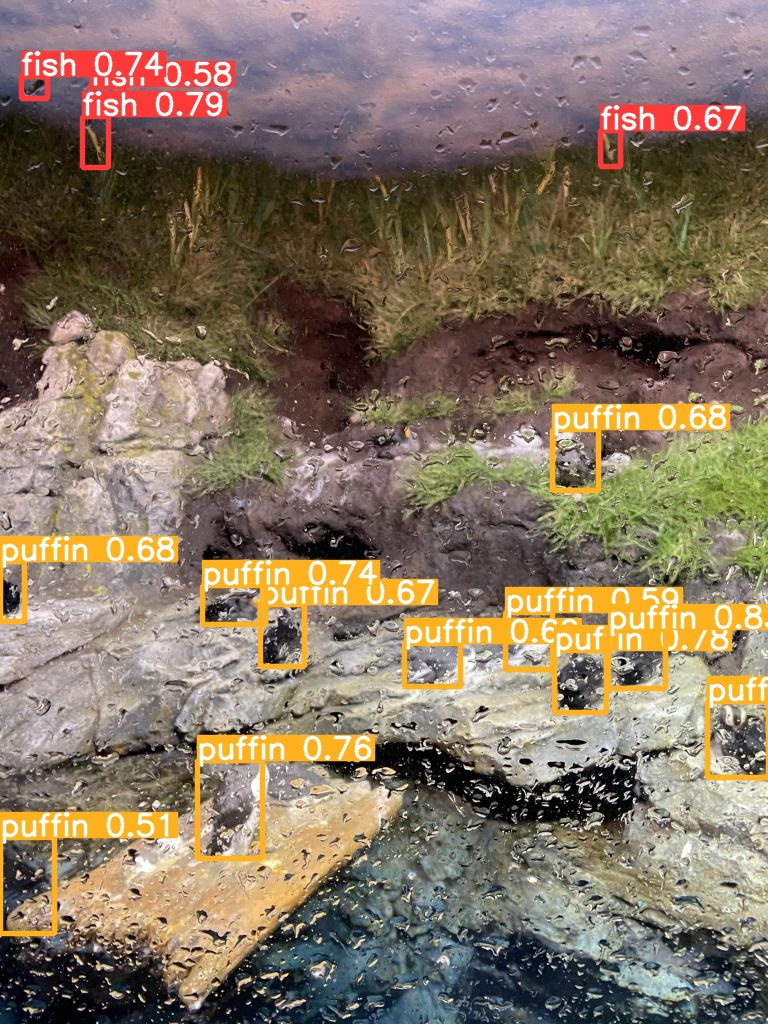

In [31]:
from IPython.display import Image
import os

val_img_path = val_img_list[3]

!python detect.py --weights /content/yolov5/runs/train/aquarium_yolov5m_result/weights/best.pt --img 640 --conf 0.5 --source "{val_img_path}"

Image(os.path.join('/content/yolov5/runs/detect/exp6', os.path.basename(val_img_path)))